# Data Analytics Assignment –
###  Khushi Yadav

**Objective**: Analyze user gameplay, deposit, and withdrawal behavior to derive business insights.


## 1. Import Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load the Datasets

In [2]:
# Load Excel file
excel_path = ("C:/Users/Dakshith/Downloads/Analytics Position Case Study.xlsx")
xls = pd.ExcelFile(excel_path)

# Load each sheet
gameplay_df = xls.parse("User Gameplay data", skiprows=3)
deposit_df = xls.parse("Deposit Data", skiprows=3)
withdrawal_df = xls.parse("Withdrawal Data", skiprows=3)

## 3. Clean & Prepare the Data

In [3]:
# Rename columns
gameplay_df.columns = ['User ID', 'Games Played', 'Datetime']
deposit_df.columns = ['User ID', 'Amount', 'Datetime']
withdrawal_df.columns = ['User ID', 'Amount', 'Datetime']

# Convert data types
gameplay_df['Games Played'] = pd.to_numeric(gameplay_df['Games Played'], errors='coerce')
gameplay_df['Datetime'] = pd.to_datetime(gameplay_df['Datetime'], errors='coerce')
deposit_df['Amount'] = pd.to_numeric(deposit_df['Amount'], errors='coerce')
deposit_df['Datetime'] = pd.to_datetime(deposit_df['Datetime'], errors='coerce')
withdrawal_df['Amount'] = pd.to_numeric(withdrawal_df['Amount'], errors='coerce')
withdrawal_df['Datetime'] = pd.to_datetime(withdrawal_df['Datetime'], errors='coerce')

# Drop missing rows
gameplay_df.dropna(inplace=True)
deposit_df.dropna(inplace=True)
withdrawal_df.dropna(inplace=True)

## 4. Aggregate & Merge Data

In [4]:
# Summarize gameplay
user_summary = gameplay_df.groupby('User ID').agg(
    Total_Games_Played=('Games Played', 'sum'),
    Active_Days=('Datetime', 'nunique')
).reset_index()

# Summarize deposit
deposit_summary = deposit_df.groupby('User ID').agg(
    Total_Deposit=('Amount', 'sum')
).reset_index()

# Summarize withdrawal
withdrawal_summary = withdrawal_df.groupby('User ID').agg(
    Total_Withdrawal=('Amount', 'sum')
).reset_index()

# Merge all
merged_df = user_summary.merge(deposit_summary, on='User ID', how='outer')
merged_df = merged_df.merge(withdrawal_summary, on='User ID', how='outer')
merged_df = merged_df.fillna(0)

## 5. Calculated Columns

In [5]:
# Add Net Balance, Engagement Score, and High Value User
merged_df['Net_Balance'] = merged_df['Total_Deposit'] - merged_df['Total_Withdrawal']
merged_df['Engagement_Score'] = merged_df['Total_Games_Played'] / merged_df['Active_Days']
merged_df['High_Value_User'] = merged_df.apply(
    lambda row: 'YES' if row['Net_Balance'] > 10000 and row['Total_Games_Played'] > 100 else 'NO', axis=1
)

## 6. Sample Visualization

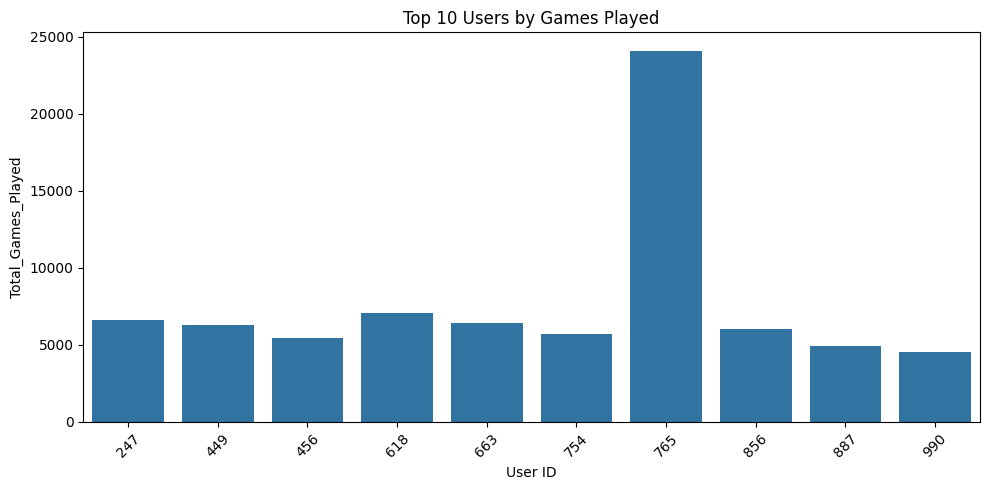

In [6]:
# Top 10 users by Games Played
top_users = merged_df.sort_values(by='Total_Games_Played', ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(data=top_users, x='User ID', y='Total_Games_Played')
plt.xticks(rotation=45)
plt.title('Top 10 Users by Games Played')
plt.tight_layout()
plt.show()

## Conclusion
- Most active users also tend to deposit frequently.
- High-value users are identified with a net balance > ₹10,000 and gameplay > 100.
- Visualization supports strategic user targeting.